In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = pd.read_csv('data_file.csv')


In [ ]:
data['x'] = data['x'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float) / 1e15
data['y'] = data['y'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float) / 1e15

In [ ]:
x = data['x']
y = data['y']
data_list = list(zip(x, y))

In [ ]:
data.shape
data.head()

,x,y
0,-5.000000e-14,-9.267629
1,-4.900000e-14,-6.600302
2,-4.800000e+00,-6.900386
3,-4.700000e+00,-31.915151
4,-4.600000e+00,-6.643456


In [ ]:
print("Max x değeri:", data["x"].max(), "\t Min x değeri:", data["x"].min())
print("Max y değeri:", data["y"].max(), "\t Min y değeri:", data["y"].min())

Max x değeri: 49.999999999998 	 Min x değeri: -43.0
Max y değeri: 53.0742276167026 	 Min y değeri: -70.54638963568


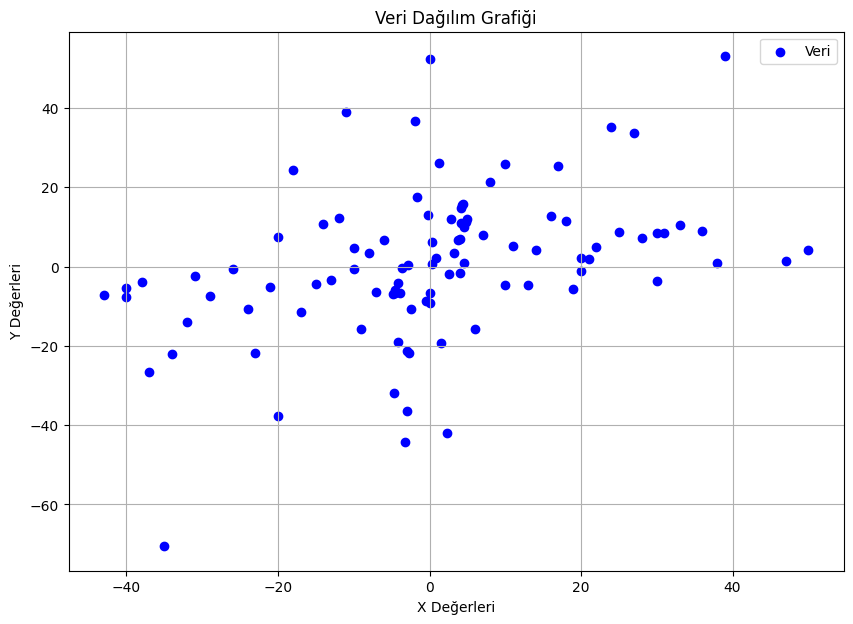

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='blue', label='Veri')

plt.title('Veri Dağılım Grafiği')
plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.legend()

plt.grid(True)
plt.show()

PSO ile en uygun ax+b doğrusunu

In [ ]:
def fitness_func(params, data):
    a, b = params
    error = 0
    for x, y in data:
        y_pred = a * x + b
        error += (y - y_pred) ** 2
    return error / len(data)

In [ ]:
class Particle:
    def __init__(self):
        self.position = [random.uniform(-10, 10), random.uniform(-10, 10)]
        self.velocity = [random.uniform(-1, 1), random.uniform(-1, 1)]
        self.best_position = self.position[:]
        self.best_fitness = float('inf')

    def update_velocity(self, global_best_position, inertia_weight=0.5, cognitive=1, social=1):
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = cognitive * r1 * (self.best_position[i] - self.position[i])
            social_velocity = social * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_weight * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]


In [ ]:
best_fitness_values = []
def pso(data, swarm_size=100, iterations=40):
    swarm = [Particle() for _ in range(swarm_size)]
    global_best_position = swarm[0].position
    global_best_fitness = float('inf')

    for iteration in range(iterations):
        for particle in swarm:
            fitness_value = fitness_func(particle.position, data)
            if fitness_value < particle.best_fitness:
                particle.best_fitness = fitness_value
                particle.best_position = particle.position[:]
            if fitness_value < global_best_fitness:
                global_best_fitness = fitness_value
                global_best_position = particle.position[:]

        for particle in swarm:
            particle.update_velocity(global_best_position)
            particle.update_position()
        best_fitness_values.append(global_best_fitness)
        print(f"{iteration}.Iteration  --> Global Best Fitness = {global_best_fitness}")

    return global_best_position,global_best_fitness

In [ ]:
best_params_pso,global_best_fitness = pso(data_list)
print("En iyi parametreler (PSO):", best_params_pso)
print("En iyi fitness değeri (PSO):", global_best_fitness)

0.Iteration  --> Global Best Fitness = 318.50836164696284
1.Iteration  --> Global Best Fitness = 298.24428770611024
2.Iteration  --> Global Best Fitness = 291.7056140494164
3.Iteration  --> Global Best Fitness = 291.3473565771928
4.Iteration  --> Global Best Fitness = 291.25649653326076
5.Iteration  --> Global Best Fitness = 291.12236211983515
6.Iteration  --> Global Best Fitness = 291.07751705804367
7.Iteration  --> Global Best Fitness = 291.07751705804367
8.Iteration  --> Global Best Fitness = 291.07751705804367
9.Iteration  --> Global Best Fitness = 291.07751705804367
10.Iteration  --> Global Best Fitness = 291.07751705804367
11.Iteration  --> Global Best Fitness = 291.0769590161835
12.Iteration  --> Global Best Fitness = 291.07653814473616
13.Iteration  --> Global Best Fitness = 291.0761414985303
14.Iteration  --> Global Best Fitness = 291.07593568063675
15.Iteration  --> Global Best Fitness = 291.0759254603743
16.Iteration  --> Global Best Fitness = 291.0759254603743
17.Iteration 

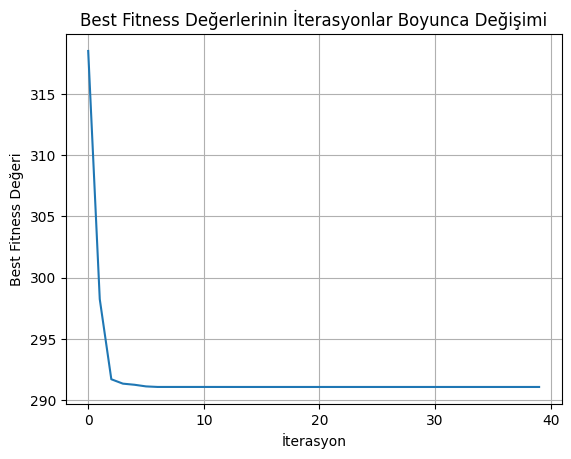

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

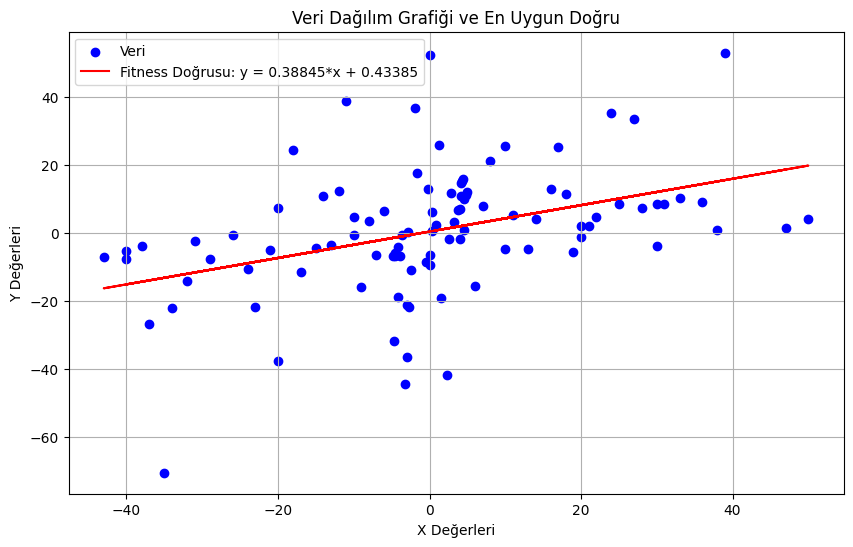

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Veri')

a, b = best_params_pso
y_pred = a * x + b
plt.plot(x, y_pred, color='red', label=f'Fitness Doğrusu: y = {a:.5f}*x + {b:.5f}')

plt.title('Veri Dağılım Grafiği ve En Uygun Doğru')
plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.legend()

plt.grid(True)
plt.show()

PSO ile 2. dereceden bir Parabol eğrisi ile oluşan en iyi parametreler

In [ ]:
def fitness_func_2(params, data):
    a, b, c = params
    error = 0
    for x, y in data:
        y_pred = a * x**2 + b * x + c
        error += (y - y_pred) ** 2
    return error / len(data)

In [ ]:
class Particle:
    def __init__(self):
        self.position = [random.uniform(-10, 10) for _ in range(3)]
        self.velocity = [random.uniform(-1, 1) for _ in range(3)]
        self.best_position = self.position[:]
        self.best_fitness = float('inf')

    def update_velocity(self, global_best_position, inertia_weight=0.5, cognitive=1, social=1):
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = cognitive * r1 * (self.best_position[i] - self.position[i])
            social_velocity = social * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_weight * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]


In [ ]:
best_fitness_values = []
def pso(data, swarm_size=100, iterations=40):
    swarm = [Particle() for _ in range(swarm_size)]
    global_best_position = swarm[0].position
    global_best_fitness = float('inf')

    for iteration in range(iterations):
        for particle in swarm:
            fitness_value = fitness_func_2(particle.position, data)
            if fitness_value < particle.best_fitness:
                particle.best_fitness = fitness_value
                particle.best_position = particle.position[:]
            if fitness_value < global_best_fitness:
                global_best_fitness = fitness_value
                global_best_position = particle.position[:]

        for particle in swarm:
            particle.update_velocity(global_best_position)
            particle.update_position()

        best_fitness_values.append(global_best_fitness)
        print(f"{iteration}.Iteration  --> Global Best Fitness = {global_best_fitness}")

    return global_best_position,global_best_fitness

best_params_pso,best_fitness = pso(data_list)
print("En iyi parametreler (PSO):", best_params_pso)
print("En iyi fitness değeri (PSO):", best_fitness)


0.Iteration  --> Global Best Fitness = 7222.503024899533
1.Iteration  --> Global Best Fitness = 1342.0224101427054
2.Iteration  --> Global Best Fitness = 613.9600363238147
3.Iteration  --> Global Best Fitness = 496.1816472390043
4.Iteration  --> Global Best Fitness = 496.1816472390043
5.Iteration  --> Global Best Fitness = 465.4597904272781
6.Iteration  --> Global Best Fitness = 352.3200443013988
7.Iteration  --> Global Best Fitness = 317.31041647194843
8.Iteration  --> Global Best Fitness = 303.00762157130845
9.Iteration  --> Global Best Fitness = 291.944069019709
10.Iteration  --> Global Best Fitness = 291.944069019709
11.Iteration  --> Global Best Fitness = 291.944069019709
12.Iteration  --> Global Best Fitness = 290.57689014381845
13.Iteration  --> Global Best Fitness = 290.57689014381845
14.Iteration  --> Global Best Fitness = 290.5591128172893
15.Iteration  --> Global Best Fitness = 290.27157249696614
16.Iteration  --> Global Best Fitness = 289.9155126406781
17.Iteration  --> Glo

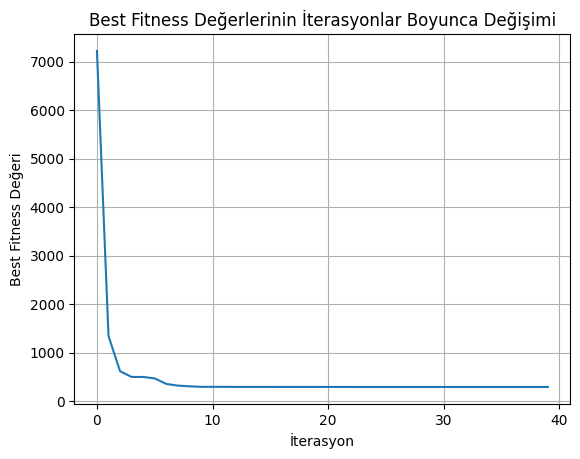

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

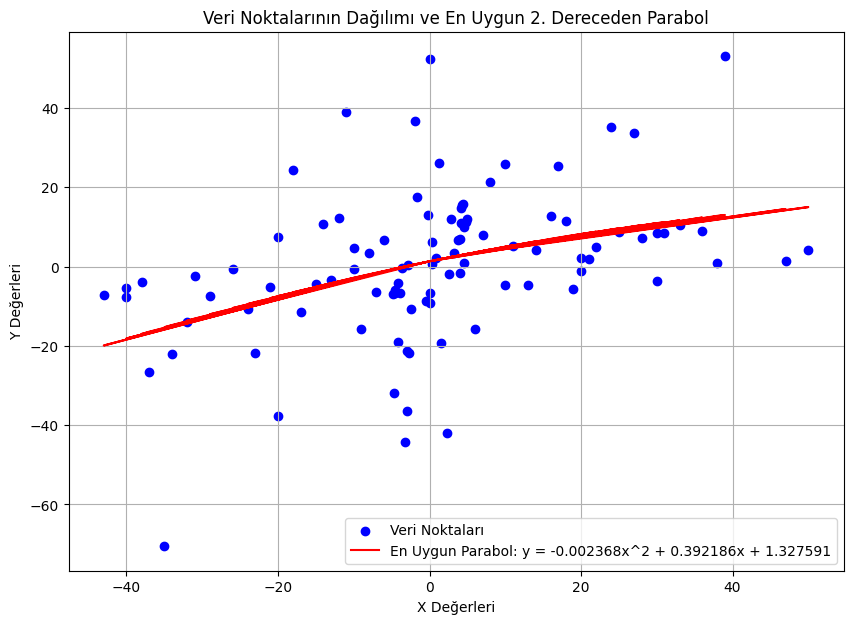

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='blue', label='Veri Noktaları')

a, b, c = best_params_pso
y_pred = a * x**2 + b * x + c
plt.plot(x, y_pred, color='red', label=f'En Uygun Parabol: y = {a:.6f}x^2 + {b:.6f}x + {c:.6f}')

x_surf = np.linspace(x.min(), x.max(), 100)
y_surf = np.linspace(y.min(), y.max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
plt.title('Veri Noktalarının Dağılımı ve En Uygun 2. Dereceden Parabol')
plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.legend()

plt.grid(True)
plt.show()

PSO ile 3. dereceden kübik Parabol eğrisi ile oluşan en iyi parametreler

In [ ]:
def fitness_func3(params, data):
    a, b, c, d = params
    error = 0
    for x, y in data:
        y_pred = a * x**3 + b * x**2 + c * x + d
        error += (y - y_pred) ** 2
    return error / len(data)

In [ ]:
class Particle:
    def __init__(self):
        self.position = [random.uniform(-10, 10) for _ in range(4)]
        self.velocity = [random.uniform(-1, 1) for _ in range(4)]
        self.best_position = self.position[:]
        self.best_fitness = float('inf')

    def update_velocity(self, global_best_position, inertia_weight=0.5, cognitive=1, social=1.0):
        for i in range(len(self.position)):
            r1 = random.uniform(0, 1)
            r2 = random.uniform(0, 1)
            cognitive_velocity = cognitive * r1 * (self.best_position[i] - self.position[i])
            social_velocity = social * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_weight * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]

In [ ]:
best_fitness_values = []
random.seed(42)
np.random.seed(42)

def pso(data, swarm_size=100, iterations=40):
    swarm = [Particle() for _ in range(swarm_size)]
    global_best_position = swarm[0].position
    global_best_fitness = float('inf')

    for iteration in range(iterations):
        for particle in swarm:
            fitness_value = fitness_func3(particle.position, data)
            if fitness_value < particle.best_fitness:
                particle.best_fitness = fitness_value
                particle.best_position = particle.position[:]
            if fitness_value < global_best_fitness:
                global_best_fitness = fitness_value
                global_best_position = particle.position[:]

        for particle in swarm:
            particle.update_velocity(global_best_position)
            particle.update_position()

        best_fitness_values.append(global_best_fitness)
        print(f"{iteration}.Iteration  --> Global Best Fitness = {global_best_fitness}")

    return global_best_position,global_best_fitness

best_params_pso,best_fitness = pso(data_list)
print("En iyi parametreler (PSO):", best_params_pso)
print("En iyi fitness değeri (PSO):", best_fitness)



0.Iteration  --> Global Best Fitness = 17912588.56272566
1.Iteration  --> Global Best Fitness = 2271931.547712173
2.Iteration  --> Global Best Fitness = 1760114.5853379122
3.Iteration  --> Global Best Fitness = 239552.97630145875
4.Iteration  --> Global Best Fitness = 96379.95435123485
5.Iteration  --> Global Best Fitness = 96379.95435123485
6.Iteration  --> Global Best Fitness = 55498.64158390515
7.Iteration  --> Global Best Fitness = 49526.90973349618
8.Iteration  --> Global Best Fitness = 19953.38321371701
9.Iteration  --> Global Best Fitness = 5055.527575220139
10.Iteration  --> Global Best Fitness = 5055.527575220139
11.Iteration  --> Global Best Fitness = 5055.527575220139
12.Iteration  --> Global Best Fitness = 5055.527575220139
13.Iteration  --> Global Best Fitness = 5055.527575220139
14.Iteration  --> Global Best Fitness = 3586.8667003990854
15.Iteration  --> Global Best Fitness = 3586.8667003990854
16.Iteration  --> Global Best Fitness = 3265.618404344234
17.Iteration  --> Gl

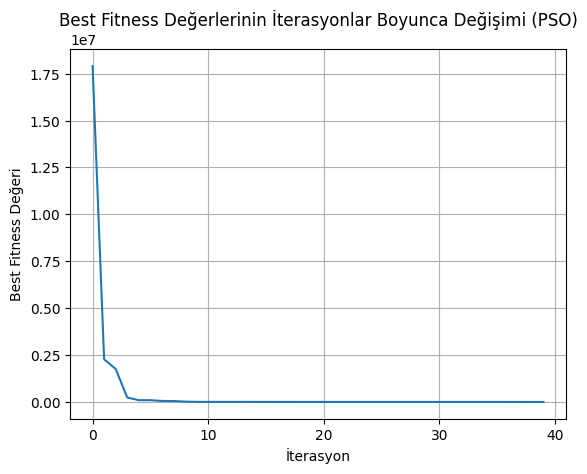

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi (PSO)')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

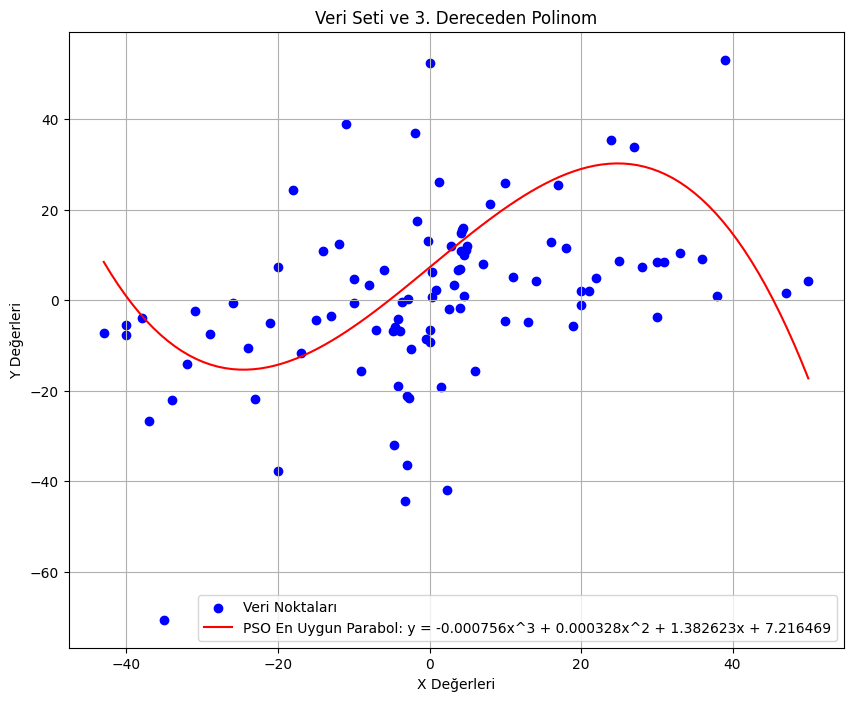

In [ ]:
x_data = data['x']
y_data = data['y']

a, b, c, d = best_params_pso

def func(x):
    return a * x**3 + b * x**2 + c * x + d

y_poly = func(x_data)
fig = plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, color='blue', label='Veri Noktaları')

x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, func(x_range), color='red', label= f'PSO En Uygun Parabol: y = {a:.6f}x^3 + {b:.6f}x^2 + {c:.6f}x + {d:.6f}')

plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.title('Veri Seti ve 3. Dereceden Polinom')
plt.legend()
plt.grid(True)
plt.show()

**pyswarms** PSO KULLANARAK EN İYİ PARAMETRELER

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=93789a19952d86b1194a4d0e7938a15dee003e1e9194766d36ed521ac8030808
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
data_list

[(-5e-14, -9.26762937441587),
 (-4.9e-14, -6.60030238008205),
 (-4.8, -6.90038614361324),
 (-4.7, -31.9151506724663),
 (-4.6, -6.64345584736646),
 (-4.5, -5.94579028319621),
 (-4.4, -6.40763999473161),
 (-43.0, -7.19188172718684),
 (-4.2, -4.08498300978444),
 (-4.1, -18.9598464512141),
 (-40.0, -7.72962828223764),
 (-3.9, -6.76248236411324),
 (-38.0, -3.86522526093072),
 (-37.0, -26.6882292960294),
 (-3.6, -0.451997392619973),
 (-35.0, -70.54638963568),
 (-34.0, -22.0652483598325),
 (-3.3, -44.3525611919292),
 (-32.0, -14.0662032113546),
 (-31.0, -2.44635124075955),
 (-3.0, -21.247762908396),
 (-29.0, -7.5129807793316),
 (-2.8, 0.340278357167623),
 (-2.7, -21.7070220228103),
 (-26.0, -0.697636105010567),
 (-2.5, -10.7503128926083),
 (-24.0, -10.6288472840979),
 (-23.0, -21.8805180319799),
 (-0.220000000000001, 12.9684829389265),
 (-21.0000000000001, -5.04834538782007),
 (-20.0000000000001, 7.34609922165241),
 (-1.90000000000001, 36.820555821539905),
 (-18.0000000000001, 24.308617217475

In [ ]:
from pyswarm import pso
import numpy as np

def fitness_func(params, data, inertia_weight=0.5, cognitive=1, social=1):
    a, b, c, d = params
    error = 0
    for x, y in data:
        y_pred = a * x**3 + b * x**2 + c * x + d
        error += (y - y_pred) ** 2
    return error / len(data)

lb = [-10, -10, -10, -10]
ub = [10, 10, 10, 10]

random.seed(42)
np.random.seed(42)

best_params_pso2, best_fitness = pso(fitness_func, lb, ub, args=(data_list,), maxiter=60, swarmsize=100)

print("En iyi parametreler (PSO):", best_params_pso2)
print("En iyi fitness değeri (PSO):", best_fitness)


Stopping search: maximum iterations reached --> 60
En iyi parametreler (PSO): [ 1.06440970e-03 -9.88450129e-03 -9.83214060e-01 -2.56854050e+00]
En iyi fitness değeri (PSO): 553.999081498465


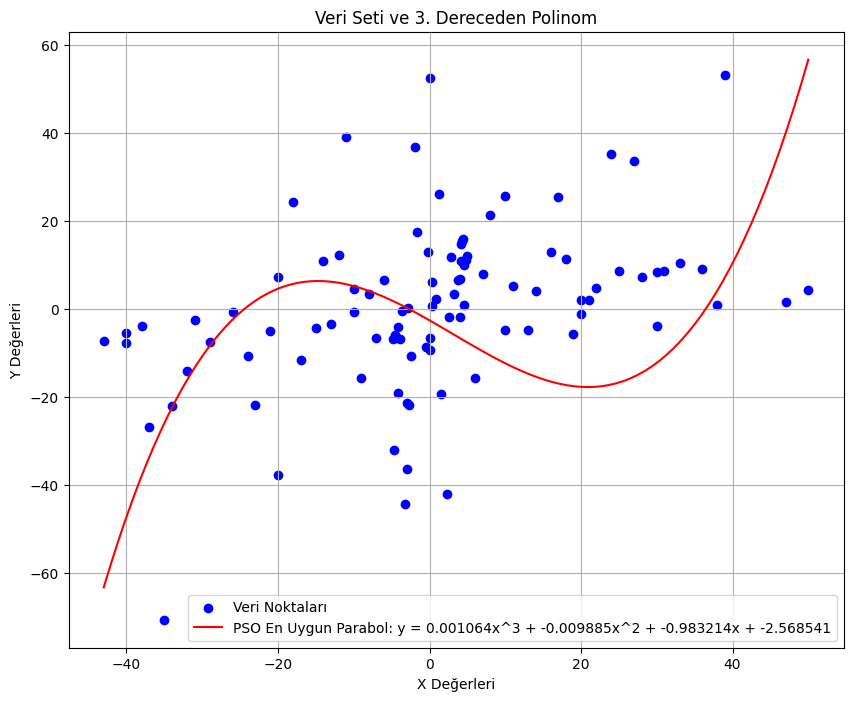

In [ ]:
x_data = data['x']
y_data = data['y']

a, b, c, d = best_params_pso2

def func(x):
    return a * x**3 + b * x**2 + c * x + d

y_poly = func(x_data)
fig = plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, color='blue', label='Veri Noktaları')

x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, func(x_range), color='red', label= f'PSO En Uygun Parabol: y = {a:.6f}x^3 + {b:.6f}x^2 + {c:.6f}x + {d:.6f}')

plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.title('Veri Seti ve 3. Dereceden Polinom')
plt.legend()
plt.grid(True)
plt.show()